## 1. Download Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

features, target = load_wine(return_X_y=True)

In [2]:
features=pd.DataFrame(features)
target=pd.DataFrame(target)
l_wine=pd.concat([features, target],axis=1)
l_wine.columns=['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','target']
l_wine.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
l_wine['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(133, 13) (45, 13) (133, 1) (45, 1)


## 2. Prediction With Support Vector Machine Classifier


In [5]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
from sklearn.model_selection import cross_validate

# cross validate SVM Classifier
scores_svc = cross_validate(svc, x_train, y_train, cv=8, return_train_score=True,return_estimator=False)
scores_svc = pd.DataFrame(scores_svc)
scores_svc

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

,fit_time,score_time,test_score,train_score
0,0.046869,0.0,0.944444,1.0
1,0.078102,0.0,0.941176,1.0
2,0.031243,0.0,0.941176,1.0
3,0.046865,0.0,0.882353,1.0
4,0.031241,0.0,0.941176,1.0
5,0.031245,0.0,1.000000,1.0
6,0.031241,0.0,0.937500,1.0
7,0.078109,0.0,0.933333,1.0


In [7]:
print('Mean Test Score of SVC Classifier: ', scores_svc ['test_score'].mean())
print('Mean Train Score of SVC Classifier: ', scores_svc ['train_score'].mean())

Mean Test Score of SVC Classifier:  0.9401450163398692
Mean Train Score of SVC Classifier:  1.0


In [8]:
y_pred_svc = svc.predict(x_test)
y_pred_svc

array([0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1,
       0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2,
       2])

[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'SVM_Prediction')]

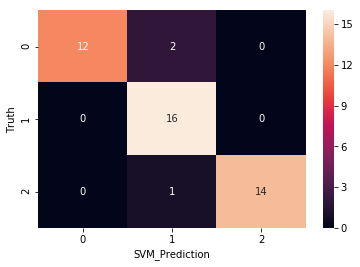

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d')
ax.set(xlabel='SVM_Prediction', ylabel='Truth')

In [10]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.84      1.00      0.91        16
           2       1.00      0.93      0.97        15

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [11]:
accuracy_score(y_pred_svc, y_test)

0.9333333333333333